<a href="https://colab.research.google.com/github/akoff045/Audrey_Koffi/blob/main/Copie_de_csi4506_a25_d1_template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**CSI 4506 Introduction à l’intelligence artificielle** <br/>
*Devoir 1 : Santé des animaux de compagnie extraterrestres, préparation des données*

# Identification

Nom : Audrey Koffi<br/>
Numéro d’étudiant : 300263639

## 1. Données

Le jeu de données pour le Devoir 1 se trouve ici :

- [github.com/turcotte/csi4106-f25/tree/main/assignments-data/a1](https://github.com/turcotte/csi4106-f25/tree/main/assignments-data/a1)

Dans votre notebook, vous pouvez accéder et lire les données directement depuis ce dépôt GitHub.

- [alien_pet_health.csv](https://raw.githubusercontent.com/turcotte/csi4106-f25/main/assignments-data/a1/alien_pet_health.csv)

## 2. Tâches

1. **Charger le jeu de données**

- Lire le fichier CSV depuis l'URL GitHub fournie.
- Afficher la dimension des données (*shape*), ainsi que les cinq premières lignes.

In [ ]:
import pandas as pd

# Chargement du dataset
df = pd.read_csv("https://raw.githubusercontent.com/turcotte/csi4106-f25/main/assignments-data/a1/alien_pet_health.csv")

# Dimensions des données et affichage des 5 premières lignes
print("Dimensions du dataset :", df.shape)
print(df.head(5))

Dimensions du dataset : (5000, 14)
   record_id  thermoreg_reading  enzyme_activity_index  dual_lobe_signal  \
0  P22042111               52.6                   97.0               3.6   
1  P21571318               41.8                  105.0               3.4   
2  P81737259               56.2                  126.0               5.5   
3  P54935007               57.7                  106.0              -4.1   
4  P63102956               34.5                   73.0               2.3   

   stress_variability habitat_zone  activity_score  fasting_flag  \
0                -3.5           c2             2.0           0.0   
1                10.5           c1             2.0           0.0   
2                 9.6           c2             5.0           0.0   
3                -4.0           c1             4.0           0.0   
4                 0.3           c4             5.0           1.0   

   health_outcome station_code  ingest_marker calibration_tag  \
0               1        Z-WHH    

2. **Valeurs manquantes**

- Examiner le jeu de données pour identifier et évaluer les valeurs manquantes dans divers attributs. Les valeurs manquantes peuvent être représentées par des symboles tels que ‘?’, des chaînes vides ou d'autres substituts.
- Lister l'attribut ou les attributs avec des valeurs manquantes.
- Décrire la méthodologie utilisée pour cette analyse, et fournir le code correspondant, le cas échéant.
- Convertir les jetons manquants (par exemple, chaînes vides, `n/a`, `?`) en `NaN`.
- Forcer les colonnes numériques ou analogues à être numériques (erreurs→`NaN`).

Après cette étape, chaque attribut sera peuplé de valeurs spécifiques ou de `NaN`.

Méthodologie

Certains attributs du dataset contiennent des valeurs manquantes représentées par des symboles ou chaînes inhabituelles ("?", "", " ", "n/a", "na", "-", "--"). Ces valeurs ont été remplacées par NaN pour uniformiser le traitement des valeurs manquantes.
Puis les colonnes devant contenir des valeurs numériques ont été converties. Les erreurs de conversion sont automatiquement transformées en NaN, ce qui permet d’identifier les valeurs manquantes implicites dans ces colonnes.
 Après le prétraitement, nous avons listé toutes les colonnes contenant au moins une valeur manquante et calculé leurs nombres par colonne.

Nous avons ensuite évaluer la gravité des valeurs manquantesen calculant leur pourcentage à l'aide des valeurs obtenues précédemment pour décider des actions possibles.

In [ ]:
import numpy as np

#Remplacer les jetons concernés par NaN
valeursManquantes = ["?",""," ", "n/a", "na","-","--","N/A","NAN"]
df = pd.read_csv("https://raw.githubusercontent.com/turcotte/csi4106-f25/main/assignments-data/a1/alien_pet_health.csv", na_values= valeursManquantes)
col_num = ["thermoreg_reading",	"enzyme_activity_index",	"dual_lobe_signal",	"stress_variability","activity_score","fasting_flag",	"health_outcome", "ingest_marker","diagnostic_noise",	"thermoreg_reading_fahrenheit"]
for col in col_num:
  df[col]= pd.to_numeric(df[col], errors="coerce")

#Liste et total des attributs avec valeurs manquantes
print(df.isnull().sum()[df.isnull().sum()> 0])






record_id                       283
thermoreg_reading               299
enzyme_activity_index           257
dual_lobe_signal                244
stress_variability              291
habitat_zone                    254
activity_score                  229
fasting_flag                    236
station_code                    216
ingest_marker                   252
calibration_tag                 229
diagnostic_noise                262
thermoreg_reading_fahrenheit    949
dtype: int64


3. **Attributs catégoriels**

- Analyser le jeu de données pour détecter d'éventuels problèmes avec les attributs catégoriels. Par exemple, vous pourriez rencontrer des cas où la même catégorie est représentée de manière incohérente en utilisant à la fois des lettres minuscules et majuscules, ou où des espaces superflus sont inclus.
- Décrire la méthodologie utilisée pour cette analyse, et fournir le code correspondant, le cas échéant.
- Normaliser les valeurs des attributs catégoriels.

In [ ]:
# Détecter automatiquement les colonnes de type objet (catégoriel)
categorical_cols = df.select_dtypes(include='object').columns
print("Colonnes catégorielles :", list(categorical_cols))

for col in categorical_cols:
    # Nettoyer espaces autour
    df[col] = df[col].astype(str).str.strip()

    # Compter combien de valeurs sont en majuscules vs minuscules
    count_upper = df[col].str.fullmatch(r'[A-Z0-9 _-]+').sum()
    count_lower = df[col].str.fullmatch(r'[a-z0-9 _-]+').sum()

    # Appliquer la transformation selon la majorité (seuil fixé à 2500 si tu veux)
    if count_upper >= 2500:
        df[col] = df[col].str.upper()
    elif count_lower >= 2500:
        df[col] = df[col].str.lower()
    else:
        # Par défaut → tout en minuscule
        df[col] = df[col].str.lower()

# Vérifier les valeurs uniques après normalisation
for col in categorical_cols:
    print(f"\n{col} → valeurs uniques : {df[col].unique()[:20]}")  # affiche 20 max




Colonnes catégorielles : ['record_id', 'habitat_zone', 'station_code', 'calibration_tag']

record_id → valeurs uniques : ['P22042111' 'P21571318' 'P81737259' 'P54935007' 'P63102956' 'P64134852'
 'P74095503' 'P12582010' 'P53695296' 'P23313347' 'P93538992' 'P59297768'
 'P16337851' 'P58846950' 'P21679655' 'P77899372' 'P95349560' 'P98150110'
 'P65969523' 'P88150067']

habitat_zone → valeurs uniques : ['c2' 'c1' 'c4' 'c5' 'c3' 'nan' 'n/a']

station_code → valeurs uniques : ['Z-WHH' 'Z-EAT' 'Z-IPF' 'Z-FKO' 'Z-SVY' 'Z-WAH' 'Z-YDK' 'Z-SFR' 'Z-DCX'
 'Z-DJJ' 'Z-COP' 'Z-HNJ' 'Z-HUU' 'Z-HJU' 'Z-TLX' 'Z-CFZ' 'Z-FWA' 'Z-VTZ'
 'Z-TCA' 'Z-HIH']

calibration_tag → valeurs uniques : ['A' 'B' 'NAN' 'N/A']


Nous avons d’abord identifié les colonnes catégorielles, puis nettoyé les données en supprimant les espaces. Ensuite, nous avons uniformisé l’écriture des catégories selon la forme la plus fréquente (majuscules ou minuscules) afin d’éviter que des valeurs identiques soient considérées comme différentes. Enfin, nous avons vérifié le résultat en affichant les valeurs uniques.

4. **Supprimer les attributs non informatifs**

- Éliminer les types d’attributs suivants du jeu de données, le cas échéant :
  - Identifiants uniques (ID)
  - Caractéristiques constantes et quasi-constantes
  - Quasi-identifiants à haute cardinalité
  - Duplicatas linéaires mis à l'échelle
- Fournir la liste des attributs spécifiques supprimés.
- Pour chaque attribut listé, offrir une brève justification de son exclusion.

In [ ]:
# Liste des attributs avant suppression
print(df.columns.tolist())
#Suppression des attributs non informatifs
df.drop(columns=[ 'record_id', 'ingest_marker', 'thermoreg_reading_fahrenheit'], inplace=True)
#Liste des attributs après supression
print(df.columns.tolist())







['record_id', 'thermoreg_reading', 'enzyme_activity_index', 'dual_lobe_signal', 'stress_variability', 'habitat_zone', 'activity_score', 'fasting_flag', 'health_outcome', 'station_code', 'ingest_marker', 'calibration_tag', 'diagnostic_noise', 'thermoreg_reading_fahrenheit']
['thermoreg_reading', 'enzyme_activity_index', 'dual_lobe_signal', 'stress_variability', 'habitat_zone', 'activity_score', 'fasting_flag', 'health_outcome', 'station_code', 'calibration_tag', 'diagnostic_noise']


Les deux colonnes  «thermoreg_reading » et « thermoreg_reading_fahrenheit » transmettent la même information sous des formats différents. thermoreg_reading est une simple conversion de thermoreg_reading_fahrenheit. Conserver les deux colonnes entraîne une redondance ; il est donc prudent d'en supprimer une afin de préserver l'efficacité de l'ensemble de données. « record_id » ne fournit aucune information sur l'état de santé de l'animal.La quasi-totalité des entrées semble être des identifiants uniques, par conséquent, elles ne contribuent pas significativement à notre analyse et doivent être supprimées. La suppression de « record_id » rationalisera l'ensemble de données et améliorera la clarté de l'analyse. L'attribut « ingest_marker » a été supprimé en raison de sa constance, toutes les valeurs sont uniformément fixées à 1,0. Étant donné que les caractéristiques constantes n'apportent aucune information discriminante pour l'analyse, le fait de n'en conserver qu'une seule améliore l'efficacité et la clarté du modèle.

5. **Caractériser les distributions**

- Pour chaque attribut numérique, fournir une caractérisation détaillée de la distribution de ses valeurs.
- Évaluer si la distribution présente une normalité ou une asymétrie.
- Déterminer si elle est unimodale ou multimodale.
- Identifier la présence de tout outlier.
- Justifier vos réponses.
- Créer des histogrammes pour soutenir visuellement vos conclusions.


Attribut : thermoreg_reading
count    4701.000000
mean       49.481337
std        11.626769
min       -79.318674
25%        44.400000
50%        49.900000
75%        54.900000
max       138.818674
Name: thermoreg_reading, dtype: float64

Attribut : enzyme_activity_index
count    4743.000000
mean      103.436284
std        38.812682
min         0.000000
25%        80.000000
50%       101.000000
75%       121.000000
max       349.993968
Name: enzyme_activity_index, dtype: float64

Attribut : dual_lobe_signal
count    4756.000000
mean        2.007717
std         2.998535
min        -6.500000
25%        -0.400000
50%         2.500000
75%         4.500000
max         8.900000
Name: dual_lobe_signal, dtype: float64

Attribut : stress_variability
count    4709.000000
mean        0.015778
std         4.985245
min       -18.000000
25%        -3.300000
50%         0.000000
75%         3.500000
max        18.700000
Name: stress_variability, dtype: float64

Attribut : activity_score
count    4771

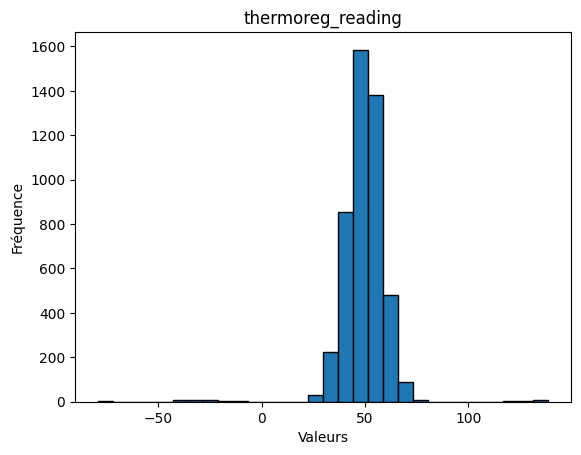

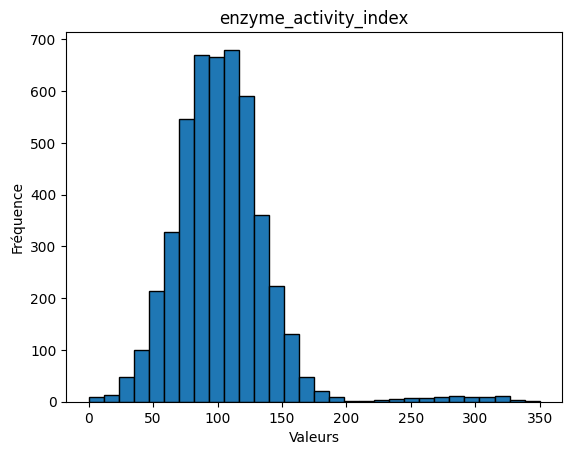

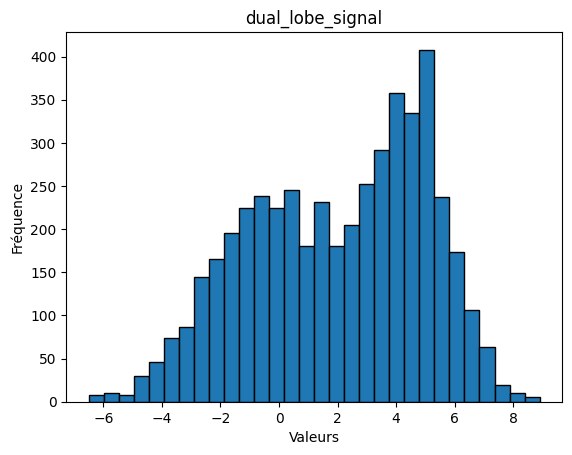

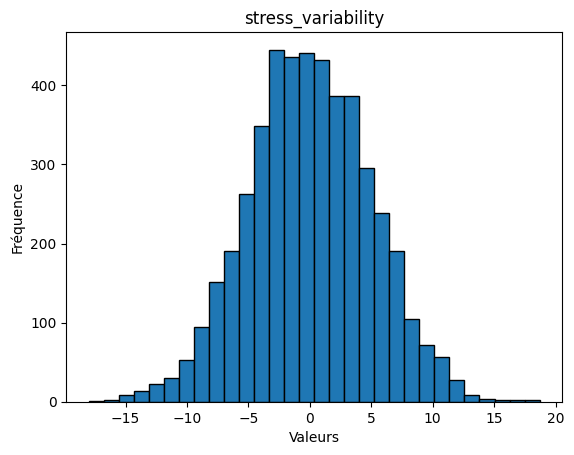

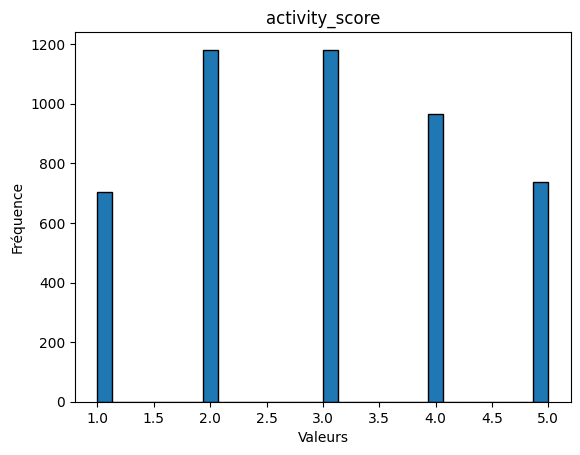

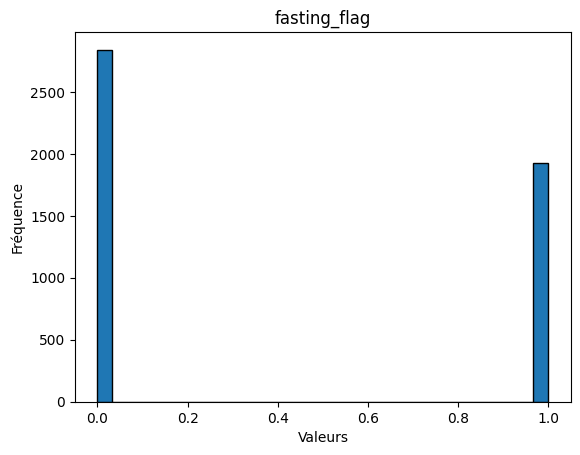

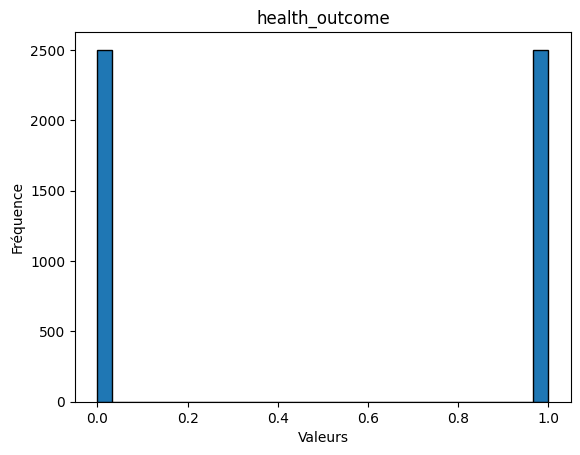

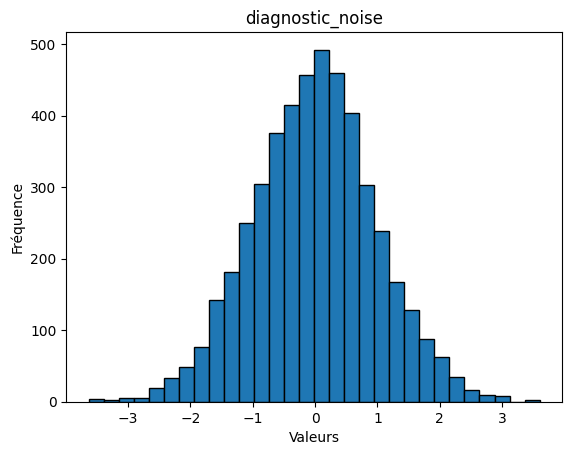

thermoreg_reading - Outliers : [73.5, 73.4, -79.31867350217316, 71.0, 26.4, -31.218673502173157, -27.51867350217315, -13.218673502173148, 125.31867350217316, -17.51867350217315, 121.21867350217316, -25.01867350217315, -30.218673502173157, -39.11867350217315, 75.60000000000001, -33.11867350217315, 79.31867350217316, -52.61867350217315, 21.0, 72.60000000000001, -24.218673502173157, -18.91867350217315, 112.81867350217316, 27.9, 71.9, 27.200000000000003, -36.11867350217315, 26.5, -28.118673502173152, 28.1, -24.718673502173157, 73.5, -79.31867350217316, 26.8, 25.8, -16.41867350217315, -23.218673502173157, 73.0, 132.51867350217316, -33.218673502173154, -7.518673502173158, 25.6, 70.8, 28.0, 72.3, 71.0, -79.31867350217316, -30.01867350217315, -26.41867350217315, 27.3, 71.2, 74.60000000000001, 28.200000000000003, -28.91867350217315, 138.81867350217317, -34.218673502173154, 74.4, 71.5, 28.200000000000003, 74.9, 126.31867350217316, 28.5, -31.41867350217315, 72.7, 133.91867350217316, 136.618673502

In [ ]:
from scipy.stats import skew
import matplotlib.pyplot as plt

# Caractérisation détaillée de la distribution des valeurs de chaque attribut numérique
for col in df.select_dtypes(include=np.number).columns:
    print(f"\nAttribut : {col}")
    print(df[col].describe())

#Evaluation de la distribution
for col in df.select_dtypes(include=np.number).columns:
    print(f"{col} - Skewness : {skew(df[col].dropna())}")

#Unimodal ou multimodal ?
for col in df.select_dtypes(include=np.number).columns:
    plt.hist(df[col].dropna(), bins=30, edgecolor='k')
    plt.title(col)
    plt.xlabel("Valeurs")
    plt.ylabel("Fréquence")
    plt.show()

for col in df.select_dtypes(include=np.number).columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[col] < Q1 - 1.5*IQR) | (df[col] > Q3 + 1.5*IQR)][col]
    print(f"{col} - Outliers : {outliers.tolist()}")





| Attribut                    | Asymétrie / Skewness                          | Outliers                                                           | Modalité / Distribution                                            | Justification                                                                                           |
| --------------------------- | --------------------------------------------- | ------------------------------------------------------------------ | ------------------------------------------------------------------ | ------------------------------------------------------------------------------------------------------- |
| **thermoreg\_reading**      | Fortement asymétrique à gauche.La majorité des températures est concentrée sur des valeurs élevées, avec quelques valeurs très basses. Non normale. (skew = -2.10) | De nombreux outliers très bas et très hauts (min ≈ -79, max ≈ 138) | Distribution unimodale                                             | Les valeurs extrêmes et l’asymétrie indiquent des mesures aberrantes ou rares, distribution non normale |
| **enzyme\_activity\_index** | Fortement asymétrique à droite Beaucoup de valeurs faibles, quelques valeurs très élevées. Non normale. (skew = 1.84)  | Outliers très élevés et très bas                                   | Distribution unimodale                                             | Distribution non normale, les points extrêmes peuvent influencer la moyenne et l’écart-type             |
| **dual\_lobe\_signal**      | Légèrement asymétrique à gauche, mais proche de symétrique. Distribution assez normale. (skew ≈ -0.3)                | Aucun                                                              | Distribution unimodale, moyenne ≈ médiane                          | Proche d’une distribution normale, valeurs extrêmes absentes                                            |
| **stress\_variability**     | Très proche de 0, distribution quasi symétrique. Peut être considérée comme normale. (skew ≈ 0)            | Quelques outliers (±14–18)                                         | Distribution unimodale, majorité des valeurs centrées autour de 0  | Symétrie indique normalité approximative, outliers à signaler                                           |
| **activity\_score**         | Quasi symétrique, distribution proche de normale. (skew ≈ 0.077)               | Aucun                                                              | Distribution unimodale, compacte, centrée autour de la moyenne ≈ 3 | Distribution normale et homogène, sans outliers                                                         |
| **fasting\_flag**           | Légèrement asymétrique à droite, pas critique. Distribution quasi symétrique. (skew ≈ 0.39) | Aucun (variable binaire)                                           | Binaire (0/1)                                                      | Distribution acceptable, asymétrie faible et attendue                                                   |
| **health\_outcome**         | Parfaitement symétrique, distribution normale. (skew ≈ 0)            | Aucun (variable binaire)                                           | Binaire (0/1)                                                      | Variable binaire équilibrée, distribution normale dans le sens statistique                              |


6. **Équilibre des classes**

- Rapporter les proportions cibles ; inclure un simple diagramme à barres.


=== Variable : habitat_zone ===
Nombre de chaque classe :
habitat_zone
c1     1645
c2     1190
c3      974
c4      549
c5      385
nan     254
n/a       3
Name: count, dtype: int64

Proportions de chaque classe :
habitat_zone
c1     0.3290
c2     0.2380
c3     0.1948
c4     0.1098
c5     0.0770
nan    0.0508
n/a    0.0006
Name: proportion, dtype: float64


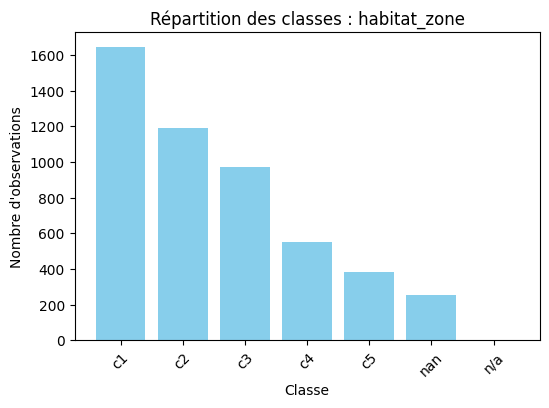


=== Variable : station_code ===
Nombre de chaque classe :
station_code
NAN      216
Z-QXD      4
Z-EIY      4
Z-HZT      4
Z-SHH      4
        ... 
Z-HDK      1
Z-LZF      1
Z-LWV      1
Z-LNX      1
Z-GWA      1
Name: count, Length: 4162, dtype: int64

Proportions de chaque classe :
station_code
NAN      0.0432
Z-QXD    0.0008
Z-EIY    0.0008
Z-HZT    0.0008
Z-SHH    0.0008
          ...  
Z-HDK    0.0002
Z-LZF    0.0002
Z-LWV    0.0002
Z-LNX    0.0002
Z-GWA    0.0002
Name: proportion, Length: 4162, dtype: float64


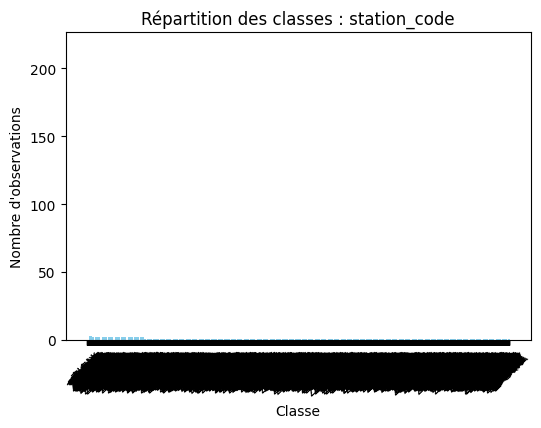


=== Variable : calibration_tag ===
Nombre de chaque classe :
calibration_tag
A      4665
NAN     229
B       100
N/A       6
Name: count, dtype: int64

Proportions de chaque classe :
calibration_tag
A      0.9330
NAN    0.0458
B      0.0200
N/A    0.0012
Name: proportion, dtype: float64


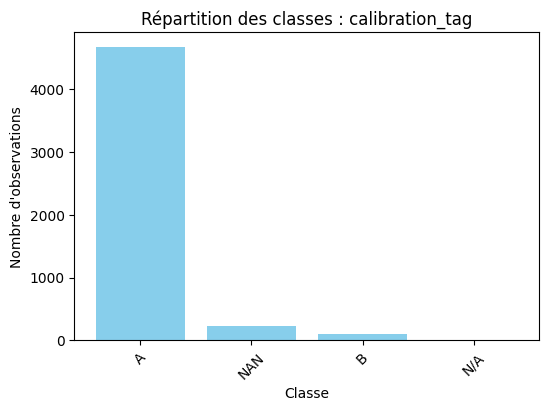

In [ ]:
import matplotlib.pyplot as plt

# Liste de variables catégorielles à analyser
categorical_vars = ['habitat_zone', 'station_code', 'calibration_tag']

for col in categorical_vars:
    # Comptage et proportions
    counts = df[col].value_counts()
    proportions = df[col].value_counts(normalize=True)

    print(f"\n=== Variable : {col} ===")
    print("Nombre de chaque classe :")
    print(counts)
    print("\nProportions de chaque classe :")
    print(proportions)

    # Diagramme à barres
    plt.figure(figsize=(6,4))
    plt.bar(counts.index.astype(str), counts.values, color='skyblue')
    plt.xlabel('Classe')
    plt.ylabel('Nombre d\'observations')
    plt.title(f'Répartition des classes : {col}')
    plt.xticks(rotation=45)  # rotation pour lisibilité si noms longs
    plt.show()




7. **Sauvegarder les données nettoyées**

- Conserver les attributs principaux plus `health_outcome`.
- Assurer les types de données corrects (numérique/ordinal/binaire).
- Sauvegarder sous `alien_pet_health_cleaned.csv`.

In [ ]:
df_clean = df['thermoreg_reading', 'enzyme_activity_index',
                'dual_lobe_signal', 'stress_variability',
                'activity_score', 'fasting_flag',
                'habitat_zone', 'station_code', 'calibration_tag',
                'health_outcome'].copy()
#Variables continues → float
#Variables discrètes / ordinales → int
#Variables binaires (0/1) → int ou bool
#Variables catégorielles (habitat_zone, station_code, etc.) → category

# Forcer les bons types
df_clean['health_outcome'] = df_clean['health_outcome'].astype(int)
df_clean['fasting_flag'] = df_clean['fasting_flag'].astype(float)
df_clean['activity_score'] = df_clean['activity_score'].astype(float)
df_clean['habitat_zone'] = df_clean['habitat_zone'].astype('category')
df_clean['station_code'] = df_clean['station_code'].astype('category')
df_clean['calibration_tag'] = df_clean['calibration_tag'].astype('category')

KeyError: ('thermoreg_reading', 'enzyme_activity_index', 'dual_lobe_signal', 'stress_variability', 'activity_score', 'fasting_flag', 'habitat_zone', 'station_code', 'calibration_tag', 'health_outcome')

# Références

# Ressources

Si vous utilisez l'assistance par IA, il est essentiel de documenter minutieusement toutes les interactions. Votre rapport doit spécifier les outils et leurs versions, accompagnés d'une transcription complète de ces interactions. La plupart des plateformes d'IA enregistrent automatiquement les conversations, il est donc conseillé de démarrer une nouvelle conversation spécifiquement pour le devoir et d'utiliser systématiquement ce fil tout au long de votre travail. Assurez-vous que cette conversation reste exclusivement centrée sur le devoir. Incluez la transcription de cette conversation.

[1] DelftStack, “How to change data type of columns in Pandas,” DelftStack. [Online]. Available: https://www.delftstack.com/fr/howto/python-pandas/how-to-change-data-type-of-columns-in-pandas/
.

[2] Apprendre Python, “Détecter et compter les valeurs manquantes (NaN) avec isnull/isna,” Apprendre Python. [Online]. Available: https://apprendrepython.com/pandas-detecter-et-compter-les-valeurs-manquantes-nan-avec-isnull-isna/
.

[3] MonCoachData, “Nettoyage de données en Python,” MonCoachData. [Online]. Available: https://moncoachdata.com/blog/nettoyage-de-donnees-python/
.

[4] Python Software Foundation, Python Documentation – pandas library, [Online]. Available: https://pandas.pydata.org/docs/
.